---
## K - Means Clustering
#### Language: Python 3.8.8
#### Author: Tianjian Sun
---

### Table of Contents
* [Introduction](#Introduction)
* [Algorithm](#Algorithm)
    - [General Process](#Algorithm)
    - [Model](#Model)
* [Illustration](#Illustration)
* [Advantages and Disadvantages](#Advantages)
    - [Advantages](#Advantages)
    - [Disadvantages](#Disadvantages)
* [Code of K-Means Clustring](#Code)
* [Applications on data sets](#Applications)
    - [*Iris* data](#iris)
    - [*wine* data set](#wine)


---

### Introduction

**K-Means Clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. 

- K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
- Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.
- A cluster refers to a collection of data points aggregated together because of certain similarities.
- You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
- Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
- In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

**Compared with other algorithms**
1. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both k-means and Gaussian mixture modeling. They both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the Gaussian mixture model allows clusters to have different shapes.
2. The unsupervised k-means algorithm has a loose relationship to the k-nearest neighbor classifier, a popular supervised machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

---
### Algorithm <a class="anchor" id="Algorithm"></a>
K-means is an unsupervised learning algorithm, meaning that our input is a collection of feature vectors with no corresponding labels.

#### General Process <a class="anchor" id="General Process"></a>
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.

- **Input**: $X= x^1,...,x^N$ unlabeld feature vectors  
- **Goal**: To group the vectors in x according to similar features.  
- **Initialize**: $C=C^1,...,C^k$ randomly chosen centroids.  
    - (Note: the K in K-means represents the number of clusters, that is K clusters.)  
    - We have centroids that are gong to in a sense walk around our feature space and try to find the center of clusters. 
- **Halt**: It halts creating and optimizing clusters when either:
    - The centroids have stabilized -— there is no change in their values because the clustering has been successful.
    - The defined number of iterations has been achieved.

#### Model <a class="anchor" id="Model"></a>
1. Calculate the Euclidean distance from each feature vector to each centroid.
2. Assign to each feature vector the centroid that is closest.
    - If feature vector $X^i$ is assigned centroid $C^j$, then the current label of feature vector $X^i$ is j.)
    - So now that each featur vector has been assigned a centroid, we have clusters.
    - Lets $S_i$ be the set of all feature vectors assigned to centroid $C^i$. (Note that $C^i$ is a vector)
3. Next update the centroids in C by the following equation: $C_j^i=\frac {1}{\left| {S_i}\right|}\sum_{x \in S_i}X_j$. The mean along the $j^{th}$ dimension for cluster i
    - Along each of the entries in your vector you update that entry according to the mean on that dimension for all the points in that cluster.So what this is doing is calculating the mean entries. So $S_i$ are all those points corresponding to the centroid $C_i$, so 1 over the number of those points times the sum of the entries of the j component. So we are just taking the mean of each of the entries in that cluster.
4. Repeat steps 1-3 until convergence
    - We take the mean of all those points, and update the centroids. Then we go back to 1 and repeat. Convergence occurs if we ever get to a point where our centroids stop moving. This means that we have kind of nested into a cluster of points and thus we can say which points belong to a group.
---

### Illustration <a class="anchor" id="Illustration"></a>
**K-Means Clustering Generalization**
What happens when clusters are of different densities and sizes? Look at Figure 1. Compare the intuitive clusters on the left side with the clusters actually found by k-means on the right side. The comparison shows how k-means can stumble on certain datasets.

<img src="images/kmean_illu1.jpg" alt="drawing" width="800"/>

To cluster naturally imbalanced clusters like the ones shown in Figure 1, you can adapt (generalize) k-means. In Figure 2, the lines show the cluster boundaries after generalizing K-Means as:
- Left plot: No generalization, resulting in a non-intuitive cluster boundary.
- Center plot: Allow different cluster widths, resulting in more intuitive clusters of different sizes.
- Right plot: Besides different cluster widths, allow different widths per dimension, resulting in elliptical instead of spherical clusters, improving the result.

<img src="images/kmean_illu2.jpg" alt="drawing" width="800"/>

---

### Advantages and Disadvantages <a class="anchor" id="Advantages"></a>
#### Advantages
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

#### Disadvantages <a class="anchor" id="Disadvantages"></a>
- Choosing k manually.
- Being dependent on initial values.
    - For a low K, you can mitigate this dependence by running k-means several times with different initial values and picking the best result. As K increases, you need advanced versions of k-means to pick better values of the initial centroids (called k-means seeding). 
- Clustering data of varying sizes and density.
    - k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you need to generalize k-means as described in the Advantages section.
- Clustering outliers.
    - Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.
- Scaling with number of dimensions.
    - As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples.  
---

### Code of K-Means Clustring <a class="anchor" id="Code"></a>

#### All packages used in this notebook
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The k-means code does the following:

- generate the centroids randomly
- create function of distance
- create function of assignment to find the closest centroid for x point
    - definition of the assignment function to find the closest/min of the distance between x(one point) and centroid(one of the Centroids) 
    - return the index of the centroid by argmin()
    - Then we can find which centroid is most closest/min distance to x, that means x blong to that centroid cluster.
- plot the data in 2 groups
- create function of make-class 
- divide the data in to 2 groups to A
- create function of new_centroids to generate the mean center for each cluster as the new_centroids
- Definition of the function to find the closest/min of the distance between x(one point) and centroid(one of the Centroids), and return the index of the centroid by argmin().- Find which centroid is most closest/min distance to x, that means x blong to that centroid cluster.
- Measure the errors by MSE

In [2]:
class k_means_clustering():
    def __init__(self, k = 3, max_iter = 100, epsilon = 0.01) -> None:
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter<self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i])>0:
                new_centroids.append(1/len(A[i])*sum(A[i])) 
        return new_centroids

    def distance(self, a, b):
        return np.sqrt((a-b)@(a-b))

    def clustering(self, x, centroids):
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A
    
    def mse_classes(self, centroids):
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5*(centroid-a)@(centroid-a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)

## Appplications on data sets <a class="anchor" id="Applications"></a>

* *Iris* data
* *wine* data

---
#### *Iris* data <a class="anchor" id="iris"></a>
---

First we apply the k-means clustering code on *Iris* flower data set. 

The [*Iris* flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

Load the *iris* data set, and pick the first 2 columns (sepal length and sepal width) for visualization.

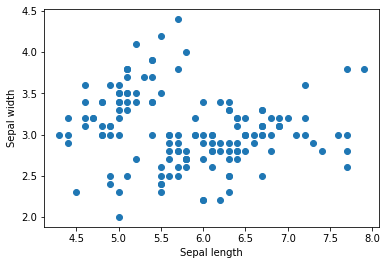

In [3]:
iris = datasets.load_iris()
X = iris.data
X= X[:,:2]
# plot the data
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

Set $k=2$, set up the initial centroids, iterate the centroids until stable, measure the errors and plot the data with K-Mean Clustering. 

In [4]:
k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)
k_means.fit(X)

Take a look at two centroid after trainning.

In [5]:
centroids = k_means.final_centroids
print(centroids)

[array([6.51842105, 2.94868421]), array([5.15      , 3.16891892])]


Plot data in 2 groups, with the fitted centroids. Note that data points are dots while coentroids are stars.

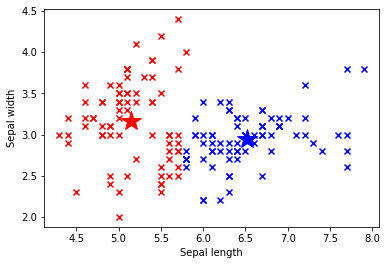

In [6]:
clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "blue", marker='x')
        else:
            plt.scatter(x[0],x[1],color = "red", marker='x')
plt.plot(centroids[0][0], centroids[0][1],color = "blue", marker='*', markersize=20)
plt.plot(centroids[1][0], centroids[1][1],color = "red", marker='*', markersize=20)
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

Looks good, but notice that there're many points that are on the boundary of two clusters, representing an uncertainty of those points.

Let's check the sum of MSE of two centroids, which can show the cluster error in two classes.

In [7]:
mse = k_means.mse_classes(centroids)
print(f"The MSE of points around two centroids is: {round(mse, 3)}.")

The MSE of points around two centroids is: 29.224.


Let's check and plot how mse improves during the training process.

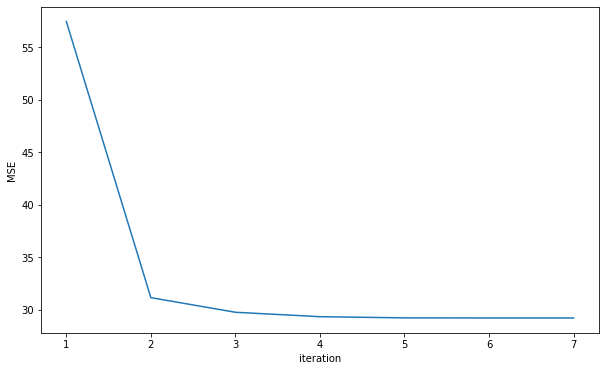

In [8]:
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
# errors
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,len(errors)+1)], errors)
plt.xlabel('iteration')
plt.ylabel("MSE")
plt.show()

It shows that the MSE drops rapidly, but the total MSE is still high. Let's try to increase *k* to check if there're more classes in the data set.

In [9]:
k_means = k_means_clustering(k=3, max_iter=100, epsilon=0.01)
k_means.fit(X)

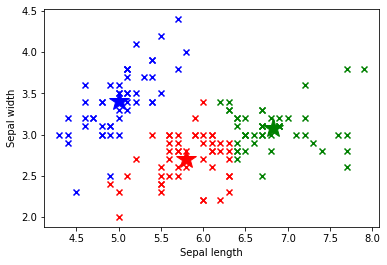

In [10]:
centroids = k_means.final_centroids
clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "blue", marker='x')
        elif label == 1:
            plt.scatter(x[0],x[1],color = "red", marker='x')
        else:
            plt.scatter(x[0],x[1],color = "green", marker='x')
plt.plot(centroids[0][0], centroids[0][1],color = "blue", marker='*', markersize=20)
plt.plot(centroids[1][0], centroids[1][1],color = "red", marker='*', markersize=20)
plt.plot(centroids[2][0], centroids[2][1],color = "green", marker='*', markersize=20)
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

Looks nice. Let's check the MSE history.

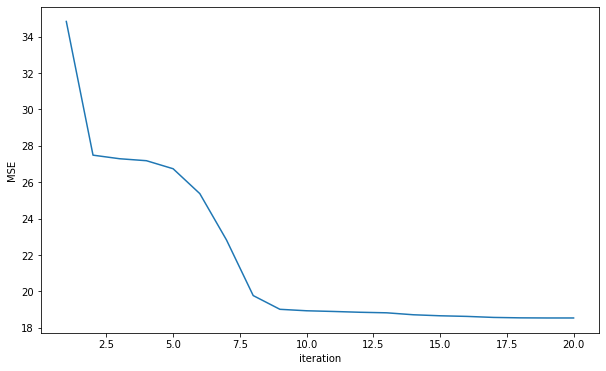

The final MSE of points around two centroids is: 18.543.


In [11]:
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
# errors
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,len(errors)+1)], errors)
plt.xlabel('iteration')
plt.ylabel("MSE")
plt.show()
mse = k_means.mse_classes(centroids)
print(f"The final MSE of points around two centroids is: {round(mse, 3)}.")

The final MSE decreases to 18.525. which is better. But keep in mind that as $k$ increases, MSE must decrease, until $k=$ number of points. So k should not be too large.

Let's try a set of $k$ and choose a better one from the $MSE-k$ figure.

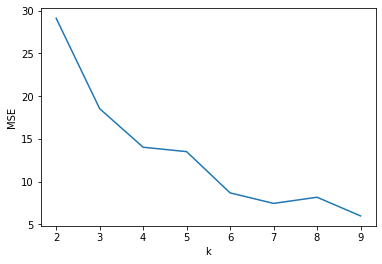

In [12]:
mse_list = []
for k in range(2, 10):
    k_means = k_means_clustering(k=k, max_iter=100, epsilon=0.01)
    k_means.fit(X)
    centroids = k_means.final_centroids
    mse = k_means.mse_classes(centroids)
    mse_list.append(mse)
plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
plt.xlabel('k')
plt.ylabel("MSE")
plt.show()

Looks like $k=3$ is a good choice, since the curve rises when $k=4$, and $k=3$ is a good change point. The result is the same with the real number of classes, which shows that k-means could be a good clustering method.

---
#### *wine* data <a class="anchor" id="wine"></a>
---

Then we test k-means clustering on the *wine* data set from *sklearn.datasets*

Load data set.

In [13]:
wine = datasets.load_wine()
X_all = wine.data
y = wine.target

Have an overview of our dataset. 

In [14]:
print(pd.DataFrame(X).describe())

                0           1
count  150.000000  150.000000
mean     5.843333    3.057333
std      0.828066    0.435866
min      4.300000    2.000000
25%      5.100000    2.800000
50%      5.800000    3.000000
75%      6.400000    3.300000
max      7.900000    4.400000


Here we visualize the first and second features to see if there's any visible clusters among three different wines.

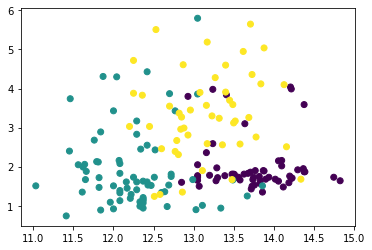

In [15]:
X = X_all[:, 0:2]
plt.scatter(X[:, 0], X[:,1],c=y)
plt.show()

Set $k=2$, set up the initial centroids, iterate the centroids until stable, measure the errors and plot the data with K-Mean Clustering. 

In [16]:
k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)
k_means.fit(X)

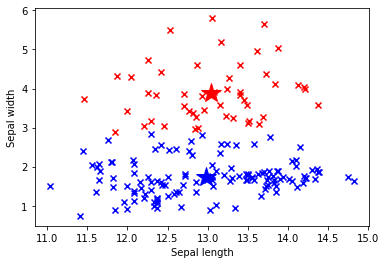

In [17]:
centroids = k_means.final_centroids
clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "blue", marker='x')
        elif label == 1:
            plt.scatter(x[0],x[1],color = "red", marker='x')
plt.plot(centroids[0][0], centroids[0][1],color = "blue", marker='*', markersize=20)
plt.plot(centroids[1][0], centroids[1][1],color = "red", marker='*', markersize=20)
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()

Looks like $k=2$ could cluster the yellow points and others.

Let's try to increase $k$.

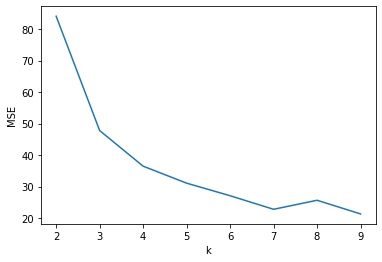

In [18]:
mse_list = []
for k in range(2, 10):
    k_means = k_means_clustering(k=k, max_iter=100, epsilon=0.01)
    k_means.fit(X)
    centroids = k_means.final_centroids
    mse = k_means.mse_classes(centroids)
    mse_list.append(mse)
plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
plt.xlabel('k')
plt.ylabel("MSE")
plt.show()

$k=3$ is a good change point, so based on the first two features, there're 2 classes in the *wine* data.

Let's try all features.

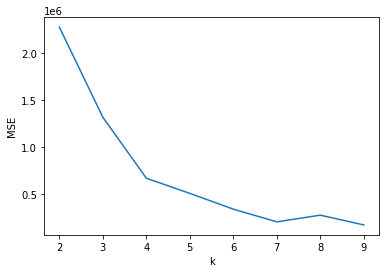

In [19]:
mse_list = []
for k in range(2, 10):
    k_means = k_means_clustering(k=k, max_iter=100, epsilon=0.01)
    k_means.fit(X_all)
    centroids = k_means.final_centroids
    mse = k_means.mse_classes(centroids)
    mse_list.append(mse)
plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
plt.xlabel('k')
plt.ylabel("MSE")
plt.show()

$k=3, 4$ seems to be good change points, so based on all features, there're 3 or 4 classes in the *wine* data, which 3 is the true number of classes in the data set. Thus k-means clustering is doing well on this data.